#### Bank Churn Data Statistical Analysis


In [ ]:
!dir

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
churn = pd.read_csv("Churn_Modelling.csv.xls",index_col=[0])
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [6]:
churn.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

the dataset contains:

        * RowNumber - RowNumber
        * CustomerId- customer id
        * Surname - name of the customer
        * CreditScore -credit score
        * Geography - location
        * Gender - gender of the customer
        * Age - age of the customer
        * Tenure - The number of years the customer has been with the bank, indicating customer loyalty.
        * Balance - The account balance of the customer.
        * NumOfProducts - The number of bank products the customer uses, indicating their level of engagement with the bank.
        * HasCrCard - Whether the customer has a credit card
        * IsActiveMember - Whether the customer is an active member of the bank 
        * EstimatedSalary -The estimated salary of the customer
        * Exited - whether the customer is churned(left) or non churned (stayed)

###### **1** What is the overall churn rate in the dataset, and how does it compare to industry benchmarks?

In [7]:
churn["Exited"].value_counts() # 1 indicate customer has churned(left the service) 
                               # 0 indicate customer has not churned(stayed with| the service) 

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Churn Rate = (Total Number of Customers/Number of Churned Customers) ×100%

In [ ]:
churn_rate = (2037/10000)*100
churn_rate

* the overall churn rate in the dataset is 20.369999999999997

industry - bank

In [13]:
# industry benchmark is less than 5-10%

that is our churn rate is higher,we need to improve some features

In [14]:
churn["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
country_grp = churn.groupby("Geography")

In [16]:
country_grp["Exited"].get_group("France").value_counts()

0    4204
1     810
Name: Exited, dtype: int64

In [17]:
country_grp["Exited"].get_group("Germany").value_counts()

0    1695
1     814
Name: Exited, dtype: int64

In [18]:
country_grp["Exited"].get_group("Spain").value_counts()

0    2064
1     413
Name: Exited, dtype: int64

    *customers from France,4204 has stayed with the bank and 810 has churned 
    *customers from Germany,1695 has stayed with the bank and 814 has churned 
    *customers from Spain,2064 has stayed with the bank and 413 has churned 

###### **2** Can you identify any significant differences in spending patterns between churned and nonchurned customers using measures of central tendency?

**churned** (dataset with customers who left the bank)

In [19]:
churned = churn[churn["Exited"]==1] # churned dataset
churned

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [20]:
churned["EstimatedSalary"].mean()

101465.67753068237

In [21]:
churned["Exited"].median()

1.0

In [22]:
churned["Exited"].mode()

0    1
Name: Exited, dtype: int64

In [23]:
churned_spending = churned["EstimatedSalary"].sum()
churned_spending

206685585.13

In [24]:
total_customers = 2037

In [25]:
total_churned = churned_spending/total_customers
total_churned

101465.67753068237

**stayed** (dataset with customers who stayed with the bank)

In [26]:
stayed = churn[churn["Exited"]==0] # stayed dataset
stayed

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


In [27]:
stayed["Exited"].mean()

0.0

In [28]:
stayed["Exited"].median()

0.0

In [29]:
stayed["Exited"].mode()

0    0
Name: Exited, dtype: int64

In [30]:
stayed_spending = churned["EstimatedSalary"].sum()
stayed_spending

206685585.13

In [31]:
total_stayed_customers = 7963

In [32]:
total_stayed = stayed_spending/total_stayed_customers
total_stayed

25955.743454728115

 spending patterns between churned and non-churned customers
 
     * for churned customers 101465.67753068237
     * for non-churned customers 25955.743454728115
 spended more by non-churned customers

###### **3** What is the dispersion in customer tenure for both churned and non-churned customers, and how does this affect the predictive modeling process?

In [ ]:
churned

In [ ]:
churned_std = churned["Tenure"].std()
churned_std

In [ ]:
q1 = churned["Tenure"].quantile(0.25)
q1

In [ ]:
q3 = churned["Tenure"].quantile(0.75)
q3

In [ ]:
churned_iqr = q3-q1
churned_iqr

In [ ]:
stayed

In [ ]:
stayed_std = stayed["Tenure"].std()
stayed_std

In [ ]:
Q1 = stayed["Tenure"].quantile(0.25)
Q1

In [ ]:
Q3 = stayed["Tenure"].quantile(0.75)
Q3

In [ ]:
stayed_iqr = Q3-Q1
stayed_iqr

predictive modeling

    * for churned, standard deviation of Tenure is 2.936106268431197
    * for stayed, standard deviation of Tenure is 2.8806577432683818
churned_customers is more predictive.churned customers stayed with the bank more

  **or**
  
    * for churned, IQR of Tenure is 6.0
    * for stayed, IQR of Tenure is 4.0
  hence IQR is greater for churned customers,predictive is more for churned customers

###### **4** How does feature scaling works on top of different features work with different techniques such as min-max,norm,standardization and interpret how each of them worked?

In [34]:
churn["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [35]:
churn["Age"].min()

18

In [36]:
churn["Age"].max()

92

In [37]:
churn["Age"].max()-churn["Age"].min()

74

In [38]:
churn["Age"].median()

37.0

In [39]:
min_max = (37-18)/(2-18)
min_max

-1.1875

    Min-Max Scaling (Min-Max Normalization):
        Scaled Value = Value−Min / Max−Min

Age (ranging from 0 to 100) and income (ranging from 0 to a high value) can be scaled using Min-Max scaling to ensure they are within the same range

In [40]:
# Age
age = churn["Age"]


In [41]:
min_age = age.min()

In [42]:
max_age = age.max()

In [44]:
# Scaled Value = Value−Min / Max−Min
scaled_age = (churn["Age"] - min_age) / (max_age - min_age)
scaled_age

RowNumber
1        0.324324
2        0.310811
3        0.324324
4        0.283784
5        0.337838
           ...   
9996     0.283784
9997     0.229730
9998     0.243243
9999     0.324324
10000    0.135135
Name: Age, Length: 10000, dtype: float64

    Standardization (Z-score Normalization):
        Scaled Value = Value−Mean / Standard Deviation

###### **5** Can you visualize the distribution of customer demographics such as age, income, and location for churned and non-churned customers using histograms or density plots?


In [74]:
churned

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [75]:
stayed

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0


* kde: plot shows the smoothed distribution curves 
* color: set the colors 
* legend: displays the legend to differentiate between the two groups.
* labels: provide labels for the legend to distinguish between the two groups 
* title: sets the title of the plot
* grid: adds gridlines to the plot
* tight_layout: ensures that plot elements are properly arranged without overlapping
* bins: parameter divides the feature into range

######  "age distribution"

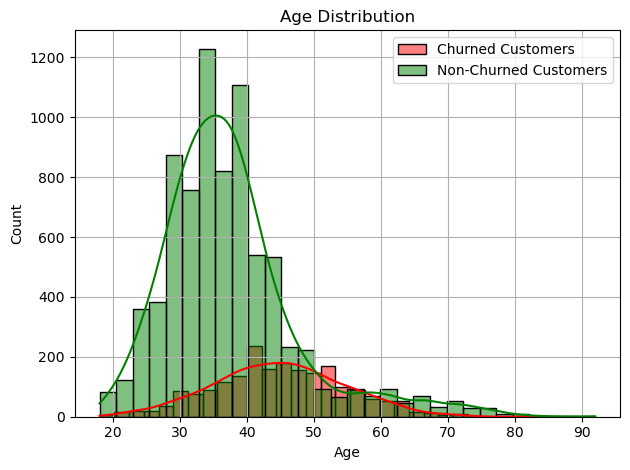

In [76]:
sns.histplot(churned['Age'], bins=30, kde=True, color='r', label='Churned Customers')
sns.histplot(stayed['Age'], bins=30, kde=True, color='g', label='Non-Churned Customers')
plt.title('Age Distribution')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

* age distributions of customers who churned and customers who did not churn.
* no:of churned customer with maximun age(between 50-60) is 84
* no:of churned customer with minimum age is 18
* no:of stayed customer with maximun age is above  1200
* no:of stayed customer with minimum age is below 200

In [77]:
churned["Age"].min()

18

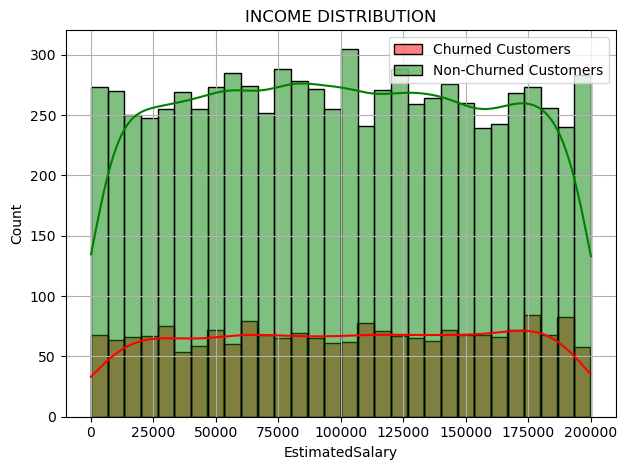

In [78]:
sns.histplot(churned["EstimatedSalary"],bins=30,kde=True,color="r",label="Churned Customers")
sns.histplot(stayed["EstimatedSalary"],bins=30,kde=True,color="g",label="Non-Churned Customers")
plt.title("INCOME DISTRIBUTION")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

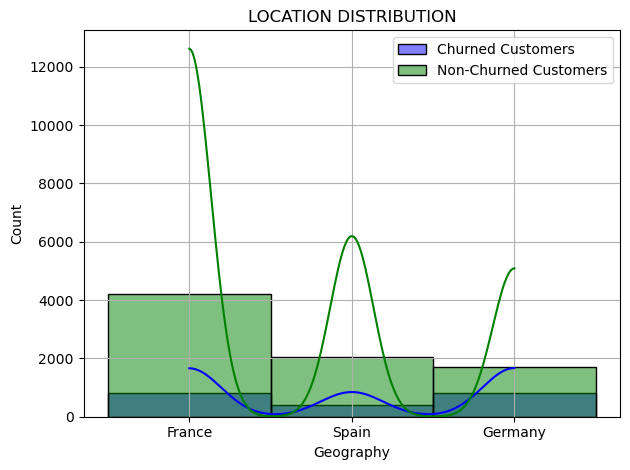

In [79]:
sns.histplot(churned["Geography"],bins=30,kde=True,color="b",label="Churned Customers")
sns.histplot(stayed["Geography"],bins=30,kde=True,color="g",label="Non-Churned Customers")
plt.title("LOCATION DISTRIBUTION")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

###### **6** Is there a significant correlation between customer satisfaction scores and the likelihood of churn, and how does this influence the development of churn prediction models?






In [45]:
churned["Gender"].value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

In [46]:
stayed["Gender"].value_counts()

Male      4559
Female    3404
Name: Gender, dtype: int64

    *females stayed very few period,compared to male
    *male churned more period compared to female

###### **7** What are the key features that exhibit the highest variability between churned and non-churned customers, and how can you leverage this information for feature selection?

In [47]:
high_variability_features = (churned.std()-stayed.std()).abs().sort_values(ascending=False)
high_variability_features.head()

Balance            4487.245885
CustomerId          948.388979
EstimatedSalary     506.831105
CreditScore           4.667666
Age                   0.363801
dtype: float64

high_variability_features calculates the absolute difference in standard deviation between churned and non-churned customers and sorts the features in descending order, highlighting the features with the highest variability.

###### **8** Are there any outliers in the dataset that could potentially skew the results of the churn prediction model, and how should you handle these outliers?

In [48]:
q1 = churn.quantile(0.25)
q3 = churn.quantile(0.75)
IQR = q3-q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 - 1.5 * IQR

In [49]:
outliers =((churn < lower_bound )|(churn > upper_bound)).any(axis=1)
outliers.value_counts()

True    10000
dtype: int64

###### **9** What is the distribution of customer churn across different demographic segments such as age groups, income levels, and geographical locations, and how does this influence the development of targeted retention strategies?

In [52]:
age_bins = [0, 18, 35, 50, 65, 100]  
age_labels = ['<18', '18-35', '36-50', '51-65', '65+'] 

In [53]:
churn['AgeGroup'] = pd.cut(churn['Age'], bins=age_bins, labels=age_labels)

In [54]:
churn_rate_by_age_grp = churn.groupby('Age')['Exited'].mean() * 100


In [55]:
print(churn_rate_by_age_grp)

Age
18     9.090909
19     3.703704
20     5.000000
21     5.660377
22    14.285714
        ...    
83     0.000000
84    50.000000
85     0.000000
88     0.000000
92     0.000000
Name: Exited, Length: 70, dtype: float64


###### **10** What is the range of customer satisfaction scores among churned customers, and how does this range compare to that of retained customers, indicating potential areas for improvement in service quality and customer experience

In [56]:
churned_satis_min = churned["IsActiveMember"].min()
churned_satis_min

0

In [57]:
churned["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [58]:
churned_satis_max = churned["IsActiveMember"].max()
churned_satis_max

1

In [59]:
stayed_satis_max = stayed["IsActiveMember"].min()
stayed_satis_max

0

In [60]:
stayed_satis_max = stayed["IsActiveMember"].max()
stayed_satis_max

1

    Range of Satisfaction Scores for Churned Customers: (0,1)
    Range of Satisfaction Scores for stayed Customers: (0,1)   

###### **11** What is the correlation between the timing of customer interactions, such as the frequency of product usage or customer service contacts, and the likelihood of churn, and how can this information be leveraged to develop proactive customer retention interventions?


###### **12** Are there any significant differences in the average account balances between churned and retained customers, and how do these differences impact the bank's revenue and customer retention strategies?

In [82]:
churned_bal_avg = churned["Balance"].mean()
churned_bal_avg

91108.53933726068

In [63]:
stayed_bal_avg = stayed["Balance"].mean()
stayed_bal_avg

72745.2967788522

average account balances is more for churned customers than stayed customers

###### **13** What is the range and standard deviation of customer credit scores or loan repayment histories among churned and retained customers, and how can this information guide the bank's risk assessment and lending practices?

In [64]:
churned_range = churned["CreditScore"].max() - churned["CreditScore"].min()
churned_range

500

In [65]:
stayed_range = stayed["CreditScore"].max() - stayed["CreditScore"].min()
stayed_range

445

In [66]:
churned_std_cs = churned["CreditScore"].std() 
churned_std_cs

100.32150264961567

In [67]:
stayed_std_cs = stayed["CreditScore"].std() 
stayed_std_cs

95.65383704715626

    Churned Customer Credit Score Range:
        for churned customers = 500
        for stayed customers = 445
    from this we can say that churned customers(wider variability) have more diverse financial backgrounds


    Churned Customer Credit Score Standard Deviation:
         for churned customers = 100
         for stayed customers = 95
     the stability and reliability of repayment patterns among churned customers less than stayed customers




###### **14** Calculate the Interquartile Range (IQR) for the customer age variable in the Bank Customer Churn Prediction dataset.Then, identify any potential outliers in the age distribution, and discuss how these outliers may impact the bank's understanding ofits customer demographics and their likelihood of churning

In [68]:
churn["Age"].sort_values()

RowNumber
3513    18
1679    18
3518    18
9521    18
2022    18
        ..
3388    84
3034    85
2459    88
6760    92
6444    92
Name: Age, Length: 10000, dtype: int64

In [69]:
age_q1 = churn["Age"].quantile(0.25)
age_q1

32.0

In [70]:
age_q3 = churn["Age"].quantile(0.75)
age_q3

44.0

IQR = Q3 - Q2

In [71]:
age_iqr = age_q3 - age_q1
age_iqr

12.0

    LOWER BOUND IQR = Q1 - 1.5 * IQR
    UPPER BOUND IQR = Q3 + 1.5 * IQR


In [72]:
age_lb_outlier = (age_q1 - 1.5) * age_iqr
age_lb_outlier

366.0

In [73]:
age_ub_outlier = (age_q3 + 1.5) * age_iqr
age_ub_outlier

546.0

points below lower bound and points above lower bound can be considered as outliers

outliers help in refining churn prediction models